In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,#1 Serial Killer,2013
1,#211,2018
2,#5,2013
3,#50Fathers,2015
4,#66,2015


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [6]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
13


In [7]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
26


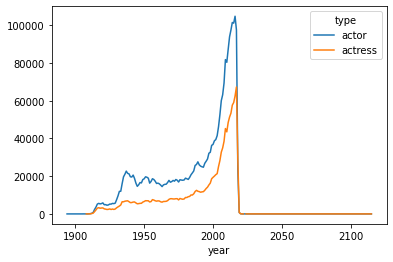

In [8]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot();

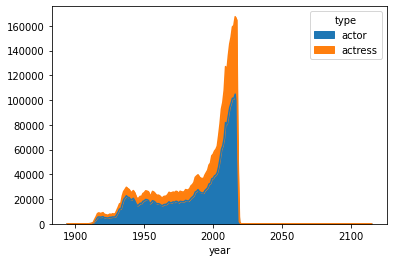

In [9]:
# Plot the number of actor roles each year
# and the number of actress roles each year,
# but this time as a kind='area' plot.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area');

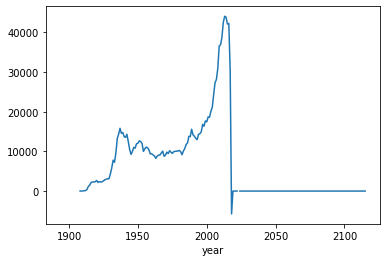

In [10]:
# Plot the difference between the number of actor roles each year
# and the number of actress roles each year over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot();

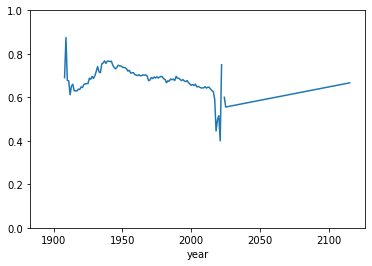

In [11]:
# Plot the fraction of roles that have been 'actor' roles
# each year in the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1]);

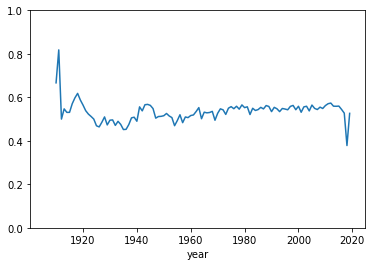

In [12]:
# Plot the fraction of supporting (n=2) roles
# that have been 'actor' roles
# each year in the history of film.

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1]);

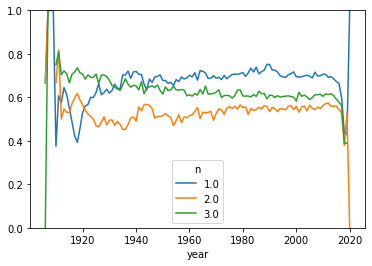

In [13]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank's roles
# were 'actor' roles for each year in the history of film.

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1]);